# IMPORTATION DES BIBLIOTHEQUES

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# CHARGEMENT DES DONNEES

In [30]:
#charger les données
df = pd.read_csv('CVdataSet.csv')

In [31]:
#visualier les premieres lignes
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [33]:
#les dimensions des données
df.shape

(962, 2)

# EXPLORER LES CATHEGORIES

In [34]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

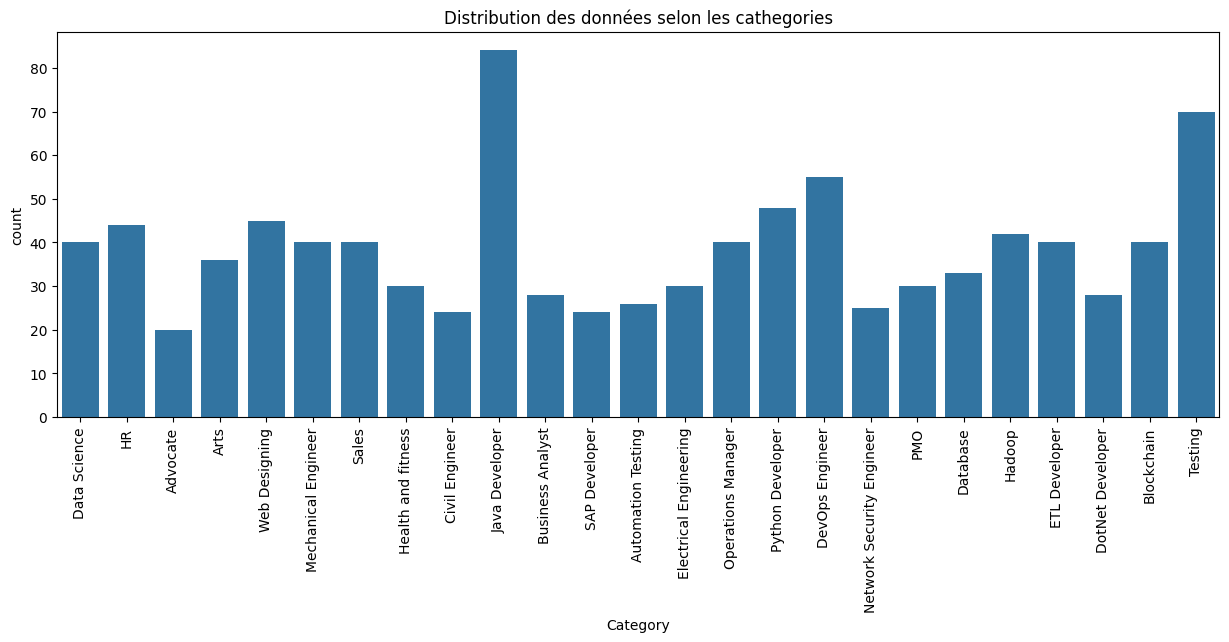

In [35]:
#distribution des données selon les cathegories
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.title("Distribution des données selon les cathegories")
plt.show()

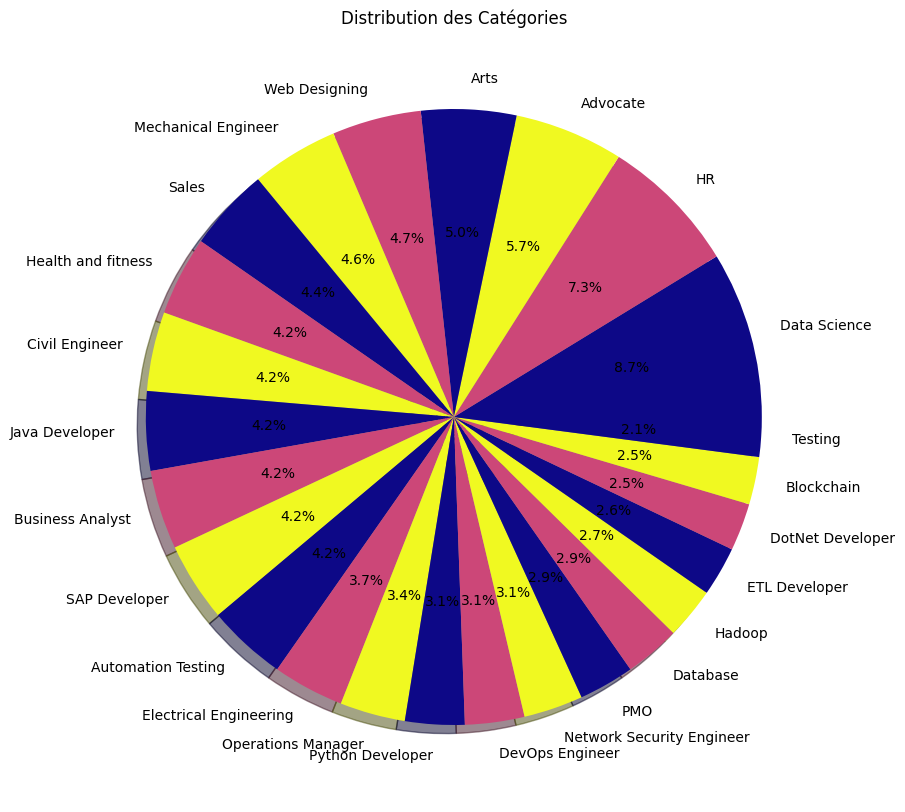

In [36]:
#Distribution des Catégories
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.title('Distribution des Catégories')
plt.show()

# Exemple d une ligne de données

In [37]:
df['Category'][10]

'Data Science'

In [38]:
df['Resume'][10]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

On remarque que la colonne "Resume" contient des caractéres spetiaux qu on doit les supprimer.

# NETTOYAGE DES DONNES:

Adresses URL,
Hashtags,
Mentions,
Lettres spéciales,
Ponctuations.                                           

In [39]:
#fonction pour le notoyage des données
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [40]:
#applique la fonction sur la colonne "Resume"
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [41]:
df['Resume'][2]

'Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Mr Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Interpreters Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 B Tech Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEKSHA CENTER January 2013 Little Flower Public School August 2000 Manipal Academy of Higher DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHUSIAST Skill Details Data Analysis Exprience Less than 1 year months excel Exprience Less than 1 year mon

# TRANSFORMER DES MOTS EN VALEURS CATEGORIELLES

In [42]:
#Encoder la colonne "Category" avec "LabelEncoder"
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [43]:
df.head(), df.tail()

(   Category                                             Resume
 0         6  Skills Programming Languages Python pandas num...
 1         6  Education Details May 2013 to May 2017 B E UIT...
 2         6  Areas of Interest Deep Learning Control System...
 3         6  Skills R Python SAP HANA Tableau SAP HANA SQL ...
 4         6  Education Details MCA YMCAUST Faridabad Haryan...,
      Category                                             Resume
 957        23  Computer Skills Proficient in MS office Word B...
 958        23   Willingness to a ept the challenges Positive ...
 959        23  PERSONAL SKILLS Quick learner Eagerness to lea...
 960        23  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
 961        23  Skill Set OS Windows XP 7 8 8 1 10 Database MY...)

In [44]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# VECTORISATION

In [45]:
#vectoriser le texte des CV en utilisant l'algorithme TF-IDF
vector = TfidfVectorizer(stop_words='english')
vector.fit(df['Resume'])
vector_result = vector.transform(df['Resume'])

# FRACTIONNEMENT

In [46]:
# deviser le données vectorisées pour le train et le test
# X: la matrice creuse TF-IDF est utilisée comme features 
# y: df['Category']: la colonne "Category" est utilisée comme labels

X_train, X_test, y_train, y_test = train_test_split(vector_result, df['Category'], test_size=0.3, random_state=42)

In [47]:
#dimensions de x_train
X_train.shape

(673, 7351)

In [48]:
#dimensions de x_test
X_test.shape

(289, 7351)

# ENTRAINER LE MODELE

**Utilisation de classifieur KNeighborsClassifier**

In [49]:
# Créez et entraînez le modèle KNeighborsClassifier
KN_modele = KNeighborsClassifier()
KN_modele.fit(X_train,y_train)

# Évaluez le modèle KNeighborsClassifier
y_pred_KN = KN_modele.predict(X_test)
accuracy_KN = accuracy_score(y_test, y_pred_KN)
print(f"Accuracy du modèle KNeighborsClassifier : {accuracy_KN:.4f}")

Accuracy du modèle KNeighborsClassifier : 0.9862


**Utilisation de classifieur SVM**

In [50]:
# Créez et entraînez le modèle SVM
SVM_modele = SVC(kernel='linear', C=1.0)
SVM_modele.fit(X_train, y_train)

# Évaluez le modèle SVM
y_pred_SVM = SVM_modele.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy du modèle SVM : {accuracy_SVM:.4f}")

Accuracy du modèle SVM : 0.9931


**Utilisation de classifieur Random Forest**

In [51]:
# Créez et entraînez le modèle Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(X_train, y_train)

# Évaluez le modèle Random Forest
y_pred_RF = clf.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print(f"Accuracy du modèle Random Forest : {accuracy_RF:.4f}")

Accuracy du modèle Random Forest : 0.9689


**Utilisation de classifieur Naive Bayes**

In [52]:
X_train = X_train.toarray()
X_test = X_test.toarray()
# Créez et entraînez le modèle Naive Bayes 
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Évaluez le modèle Naive Bayes 
y_pred_NB = clf.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred_NB)

print(f"Accuracy du modèle Naive Bayes : {accuracy_NB:.4f}")

Accuracy du modèle Naive Bayes : 0.9689


**Comparer les accuracy**

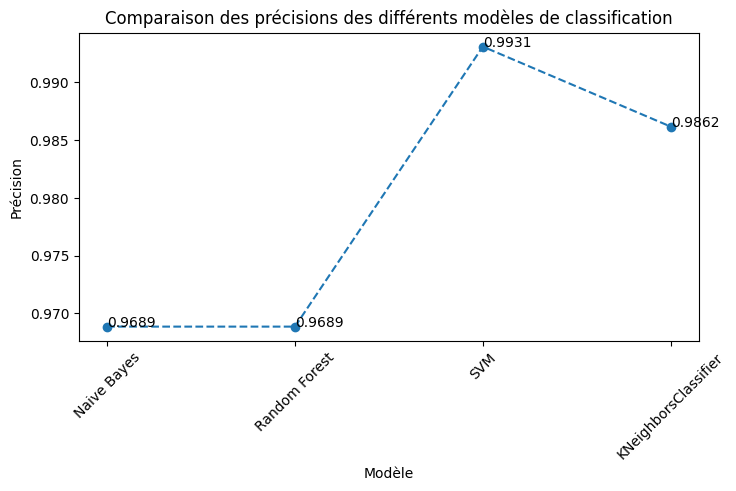

In [53]:
# Liste des accuracy
accuracy_list = [accuracy_NB, accuracy_RF, accuracy_SVM, accuracy_KN]

# Liste des noms des modèles
model_names = ["Naive Bayes", "Random Forest", "SVM", "KNeighborsClassifier"]

# Création d'une courbe
plt.figure(figsize=(8, 4))
plt.plot(model_names, accuracy_list, marker="o", linestyle="--")
for i, value in enumerate(accuracy_list):
    plt.annotate(f"{value:.4f}", (model_names[i], value))

plt.xlabel("Modèle")
plt.ylabel("Précision")
plt.title("Comparaison des précisions des différents modèles de classification")
plt.xticks(rotation=45)

# Affichage de la figure
plt.show()

On remarque que le modele SVM propose les meilleurs peroformances de classification avec une accuracy de 99.31%.

LE RAPPORT DE CLASSIFCATION DU MODELE SVM

In [54]:
class_report_SVM = classification_report(y_test, y_pred_SVM)
print("Rapport de Classification:")
print(class_report_SVM)

Rapport de Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       0.94      1.00      0.97        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        12


SYSTEME DE PREDICTION: enregistrer le modele SVM final pour une utilisation dans le WebApp 

In [55]:
#enregistrer le modele final SVM
import pickle
pickle.dump(vector,open('model_vecoriz.pkl','wb'))
pickle.dump(SVM_modele, open('SVM_modele.pkl', 'wb'))
